# Moneyball

## Data exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define plot style
sns.set_theme()

In [3]:
file = "baseball.csv"
df = pd.read_csv(file, encoding="utf-8")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
cols = df.columns
target = "W"
target_flavor = ["Playoffs", "RankSeason", "RankPlayoffs"]
feat_flavor = ["Team", "League", "Year"]
exclude = target_flavor + feat_flavor + [target] + ["G"]
exclude


['Playoffs', 'RankSeason', 'RankPlayoffs', 'Team', 'League', 'Year', 'W', 'G']

In [6]:
feats = list(filter(lambda x: x not in exclude, cols))
feats

['RS', 'RA', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']

In [7]:
df["Playoffs"].replace({0: "No", 1: "Yes"}, inplace=True)

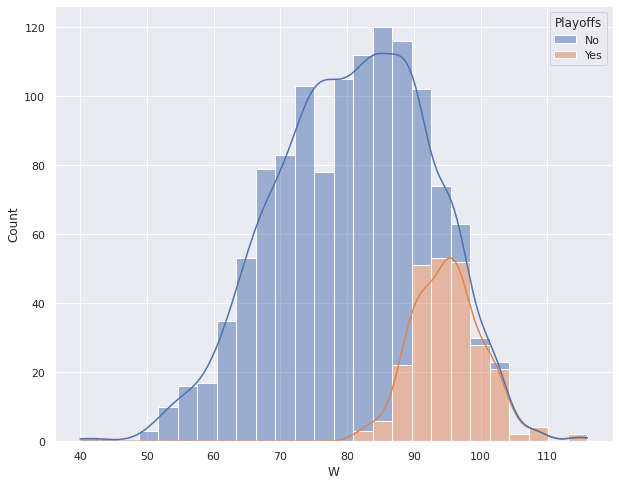

In [8]:
fig = plt.figure(figsize=(10,8))
sns.histplot(data=df, x="W", hue="Playoffs", multiple="stack", kde=True);

In [9]:
cols_to_plot = ["Playoffs", "W"] + feats
cols_to_plot

['Playoffs', 'W', 'RS', 'RA', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']

Plotting pairGrid for ['Playoffs', 'W', 'RS', 'RA', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']



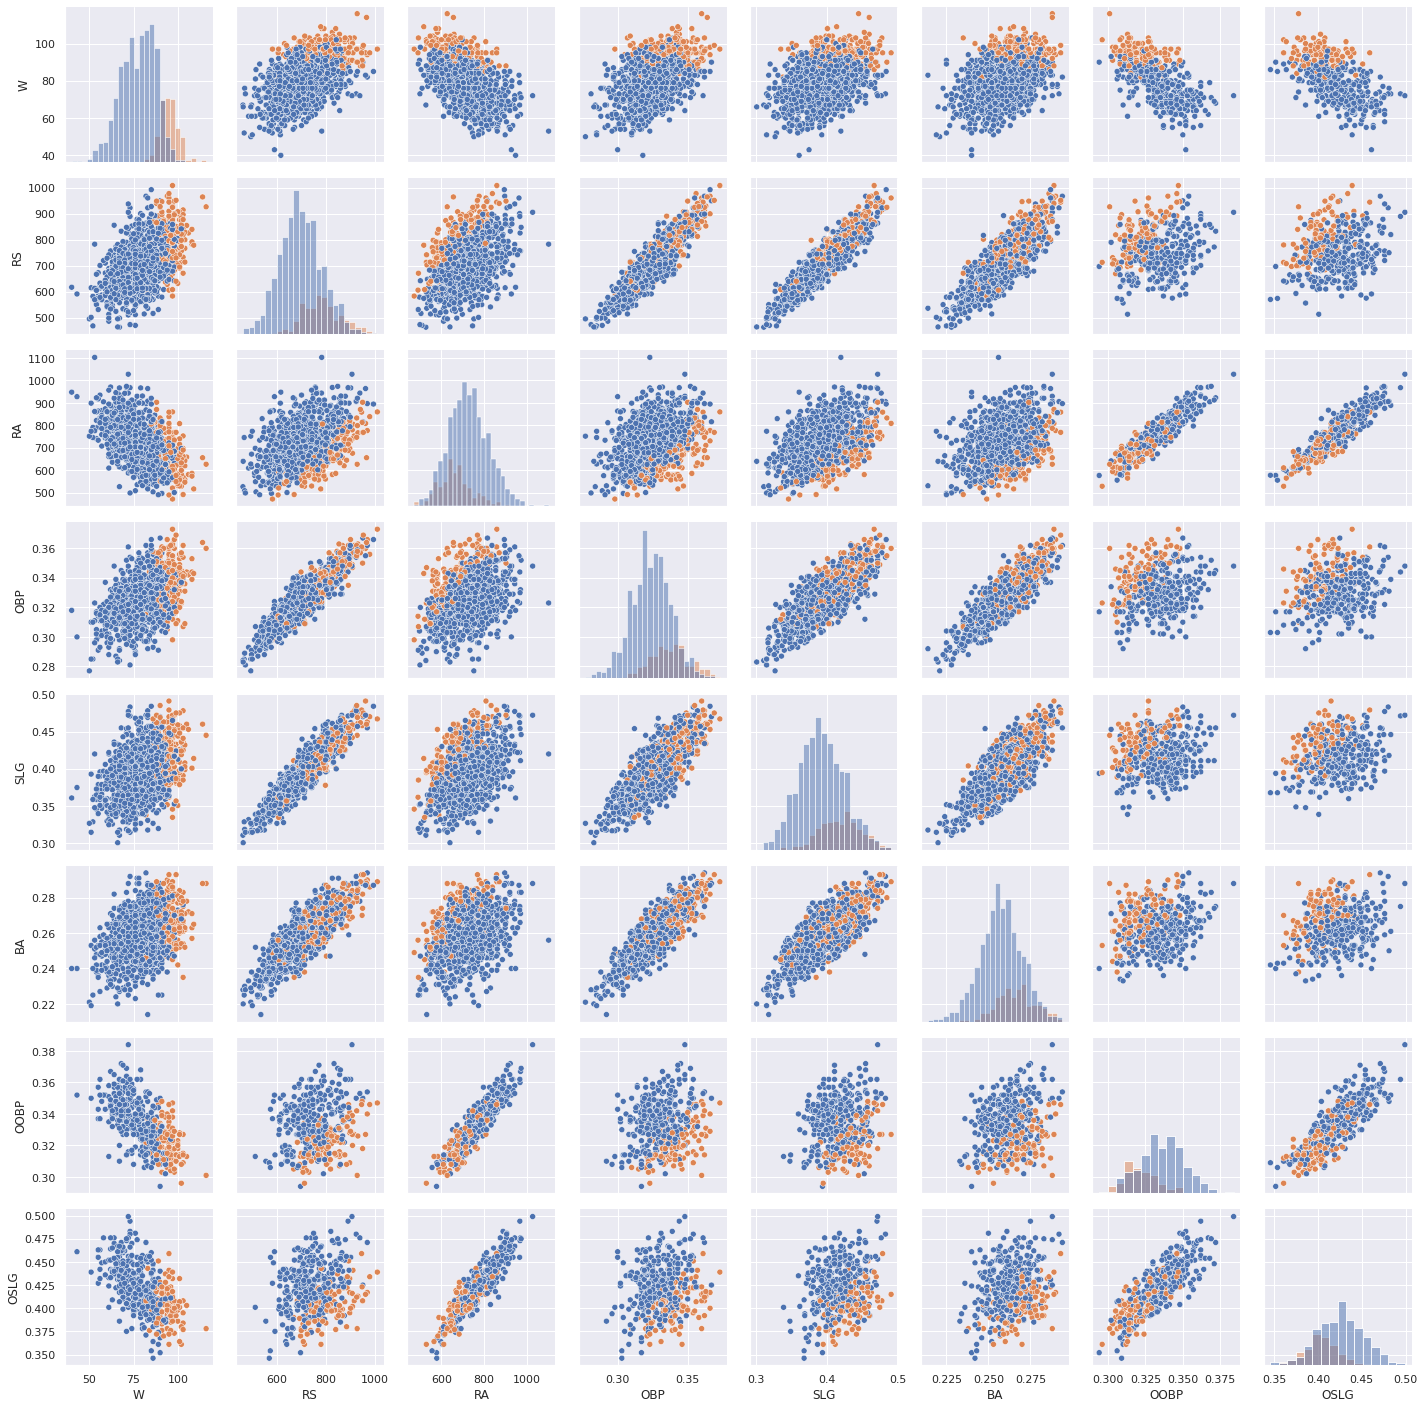

In [10]:
print(f"Plotting pairGrid for {cols_to_plot}\n")
g = sns.PairGrid(df[cols_to_plot], hue="Playoffs")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [11]:
len(cols_to_plot)

9

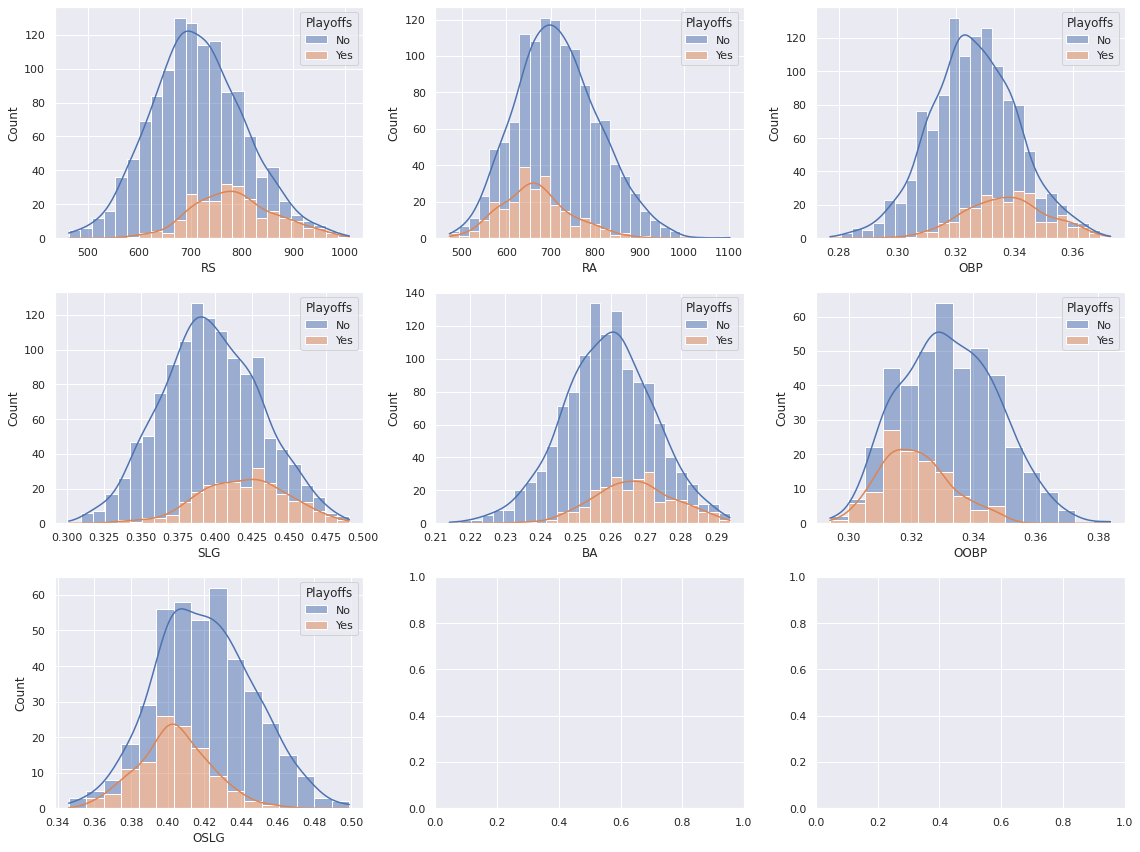

In [12]:
fig, axes = plt.subplots(3,3 , figsize=(16,12))
[sns.histplot(data=df, x=feat, hue="Playoffs", multiple="stack", kde=True, ax=ax) for feat, ax in zip(feats, axes.flatten())];
fig.tight_layout()

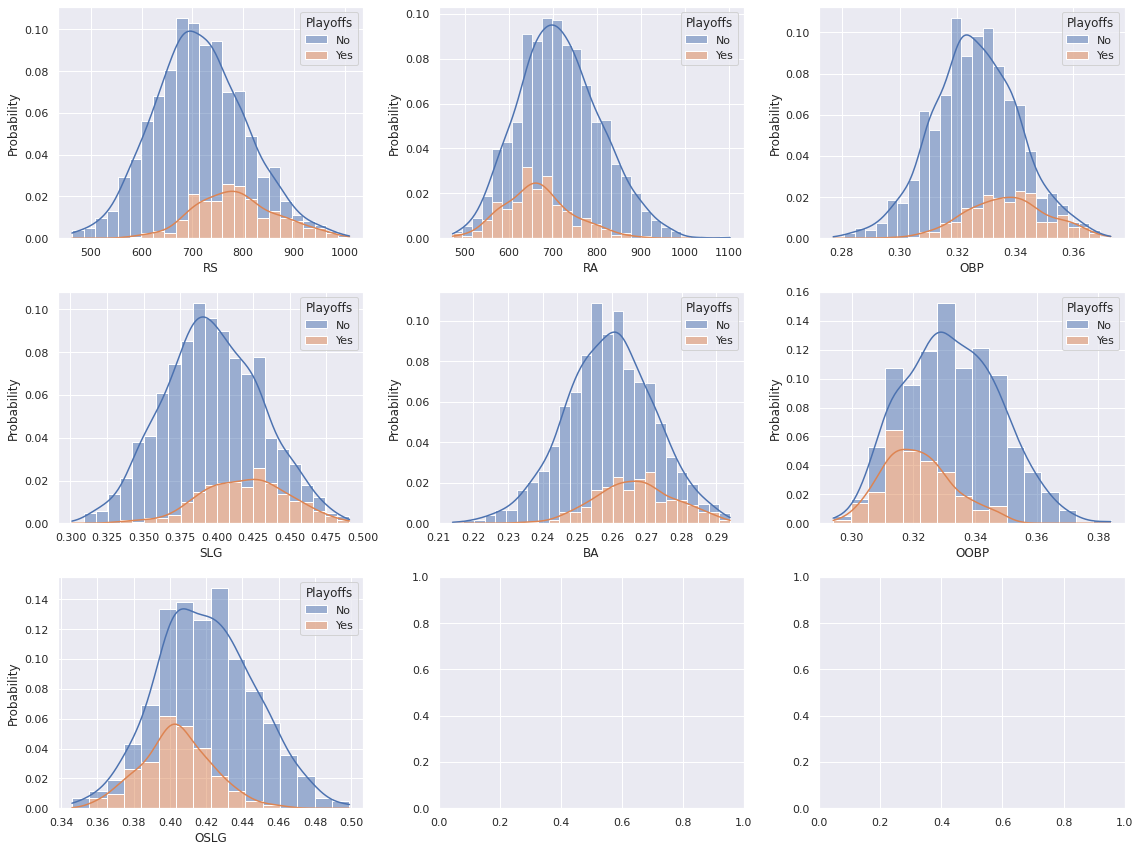

In [13]:
fig, axes = plt.subplots(3,3 , figsize=(16,12))
[sns.histplot(data=df, x=feat, hue="Playoffs", stat="probability", multiple="stack", kde=True, ax=ax) for feat, ax in zip(feats, axes.flatten())];
fig.tight_layout()

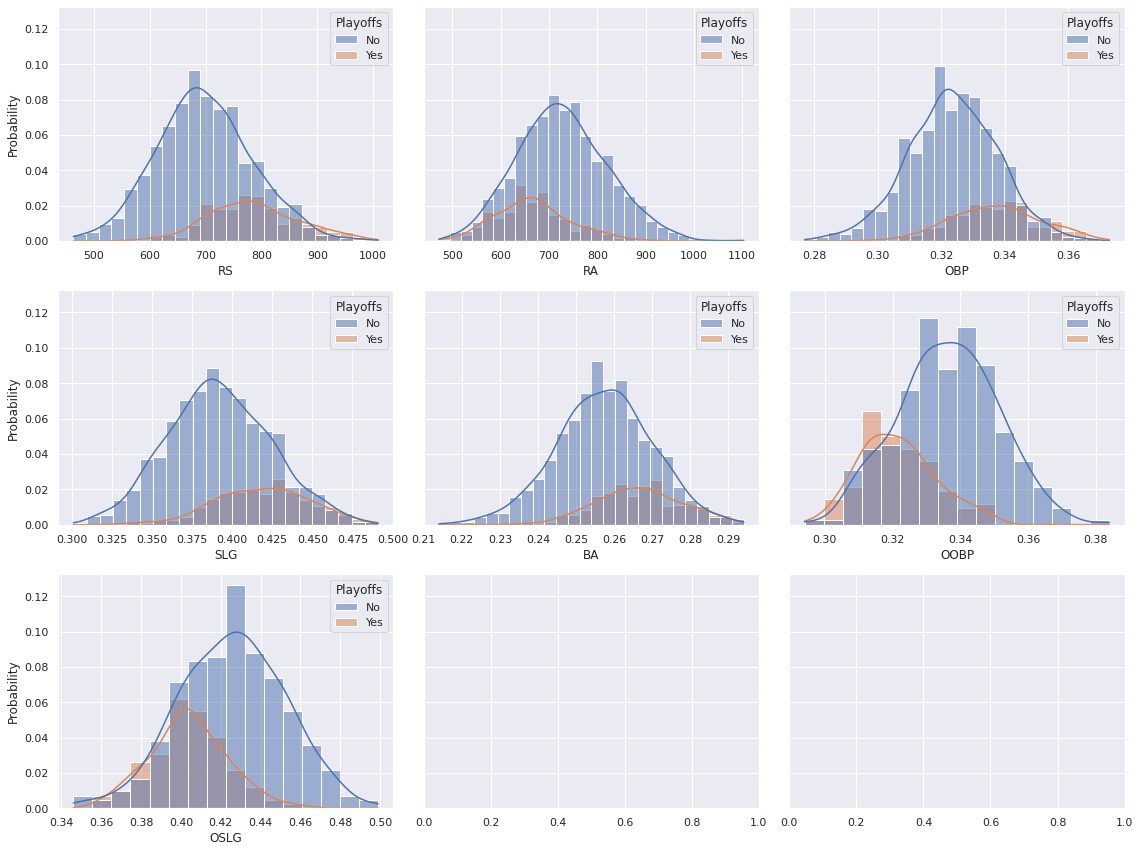

In [14]:
fig, axes = plt.subplots(3,3, sharey=True , figsize=(16,12))
[sns.histplot(data=df, x=feat, hue="Playoffs", stat="probability", multiple="layer", kde=True, ax=ax) for feat, ax in zip(feats, axes.flatten())];
fig.tight_layout()

# Plots for use in report

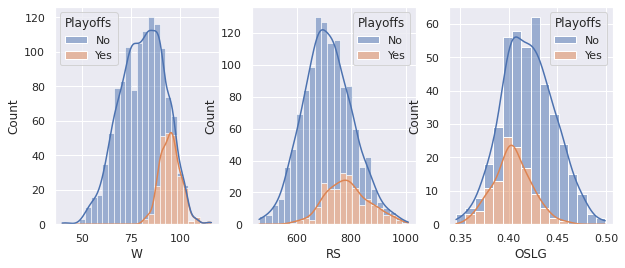

In [23]:
plot_cols = ["W", "RS", "OSLG"]
fig, axes = plt.subplots(1,len(plot_cols) , figsize=(10,4))
[sns.histplot(data=df, x=feat, hue="Playoffs", multiple="stack", kde=True, ax=ax) for feat, ax in zip(plot_cols, axes.flatten())];
fig.savefig("W_RS_OSLG_hists.png")

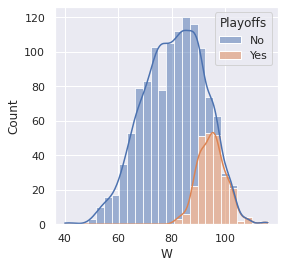

In [20]:
fig = plt.figure(figsize=(4,4))
sns.histplot(data=df, x="W", hue="Playoffs", multiple="stack", kde=True);
fig.savefig("W_hist.png")

In [30]:
liste = df.count()
liste

Team            1232
League          1232
Year            1232
RS              1232
RA              1232
W               1232
OBP             1232
SLG             1232
BA              1232
Playoffs        1232
RankSeason       244
RankPlayoffs     244
G               1232
OOBP             420
OSLG             420
dtype: int64